In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import acquire

In [2]:
# df1 = pd.read_csv('2018-04-26_and_2018-05-26.csv', nrows=31)
# df2 = pd.read_csv('2018-05-27_and_2018-06-26.csv', nrows=31)
# df3 = pd.read_csv('2018-06-27_and_2018-07-27.csv', nrows=31)
# df4 = pd.read_csv('2018-07-28_and_2018-08-26.csv', nrows=30)
# df5 = pd.read_csv('2018-08-27_and_2018-09-26.csv', nrows=31)
# df6 = pd.read_csv('2018-09-27_and_2018-10-27.csv', nrows=31)
# df7 = pd.read_csv('2018-10-28_and-2018-11-27.csv', nrows=31)
# df8 = pd.read_csv('2018-11-28_and_2018-12-28.csv', nrows=9)

In [3]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], join="inner", ignore_index=True)

I put above data into my acquire_fitbit_data function

In [4]:
df = acquire.get_fitbit_data()

In [5]:
df.head(1)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


Rename columns to make them easier to use

In [6]:
df = df.rename(columns = {'Date':'date', 'Calories Burned':'calories_burned', 'Steps':'steps', 'Distance':'distance', 'Floors':'floors', 'Minutes Sedentary':'minutes_sedentary', 'Minutes Lightly Active':'minutes_lightly_active', 'Minutes Fairly Active':'minutes_fairly_active', 'Minutes Very Active':'minutes_very_active', 'Activity Calories':'activity_calories'})
df.head(1)

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


Check to see if there are any nulls

In [7]:
df.isna().sum()

date                      0
calories_burned           0
steps                     0
distance                  0
floors                    0
minutes_sedentary         0
minutes_lightly_active    0
minutes_fairly_active     0
minutes_very_active       0
activity_calories         0
dtype: int64

I had nulls at first and used the below code to fix them, but realized my nulls were due to importing an extra row that didn't exist in the 4th csv

In [8]:
# null_columns=df.columns[df.isnull().any()]
# print(df[df.isnull().any(axis=1)][null_columns].head())

In [9]:
# df.replace(np.nan, 0, inplace=True)

In [10]:
# df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

Create the to_datetime object

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df = df.set_index('date')

In [13]:
df.head(1)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [14]:
df.dtypes[df.dtypes == 'object']

calories_burned      object
steps                object
minutes_sedentary    object
activity_calories    object
dtype: object

In [15]:
df.calories_burned = df.calories_burned.str.replace(',', '').astype(float)
df.minutes_sedentary = df.minutes_sedentary.astype(str)
df.minutes_sedentary = df.minutes_sedentary.str.replace(',', '').astype(float)
df.activity_calories = df.activity_calories.str.replace(',', '').astype(float)
df.steps = df.steps.str.replace(',', '').astype(float)

In [16]:
df.dtypes

calories_burned           float64
steps                     float64
distance                  float64
floors                      int64
minutes_sedentary         float64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories         float64
dtype: object

In [17]:
df.isnull().sum()

calories_burned           0
steps                     0
distance                  0
floors                    0
minutes_sedentary         0
minutes_lightly_active    0
minutes_fairly_active     0
minutes_very_active       0
activity_calories         0
dtype: int64

In [18]:
df.minutes_sedentary

date
2018-04-26    1347.0
2018-04-27    1158.0
2018-04-28     702.0
2018-04-29     891.0
2018-04-30     880.0
2018-05-01     919.0
2018-05-02     927.0
2018-05-03     876.0
2018-05-04    1012.0
2018-05-05     969.0
2018-05-06     976.0
2018-05-07     907.0
2018-05-08    1221.0
2018-05-09    1438.0
2018-05-10    1295.0
2018-05-11     947.0
2018-05-12     756.0
2018-05-13     895.0
2018-05-14     959.0
2018-05-15     767.0
2018-05-16     825.0
2018-05-17     867.0
2018-05-18     682.0
2018-05-19     646.0
2018-05-20     795.0
2018-05-21     727.0
2018-05-22     625.0
2018-05-23     921.0
2018-05-24     804.0
2018-05-25     821.0
               ...  
2018-11-07     566.0
2018-11-08     716.0
2018-11-09     698.0
2018-11-10     589.0
2018-11-11     486.0
2018-11-12     651.0
2018-11-13     615.0
2018-11-14     835.0
2018-11-15     644.0
2018-11-16     576.0
2018-11-17     464.0
2018-11-18     450.0
2018-11-19     502.0
2018-11-20     810.0
2018-11-21     582.0
2018-11-22     522.0
2018-11-

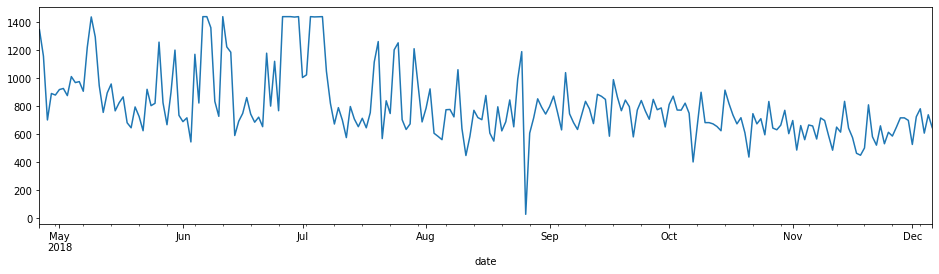

In [19]:
df.minutes_sedentary.resample('D').mean().plot(figsize=(16,4))

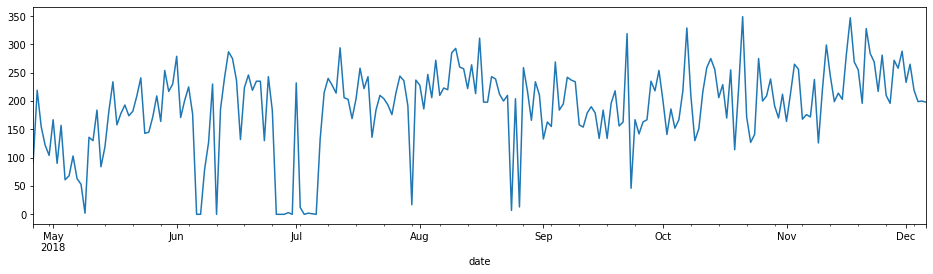

In [24]:
df.minutes_lightly_active.resample('D').mean().plot(figsize=(16,4))

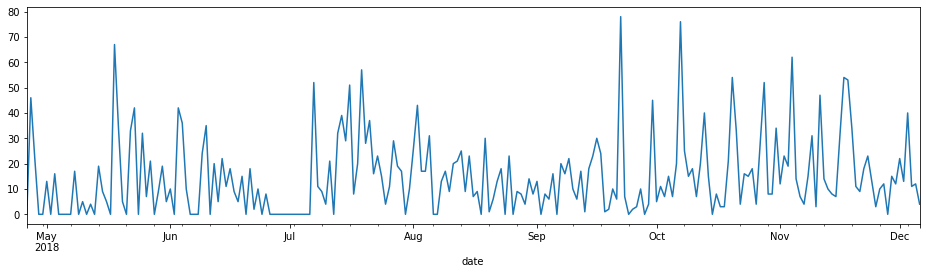

In [25]:
df.minutes_fairly_active.resample('D').mean().plot(figsize=(16,4))

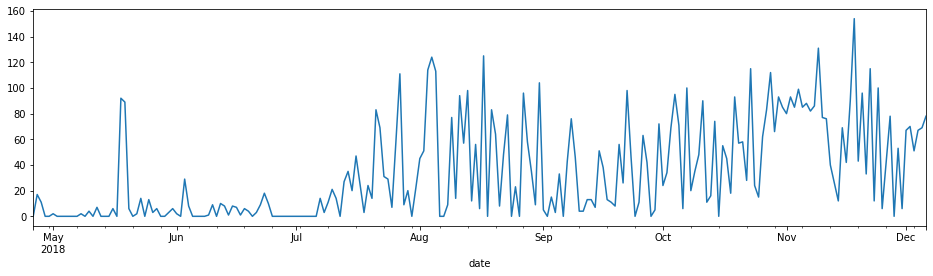

In [26]:
df.minutes_very_active.resample('D').mean().plot(figsize=(16,4))

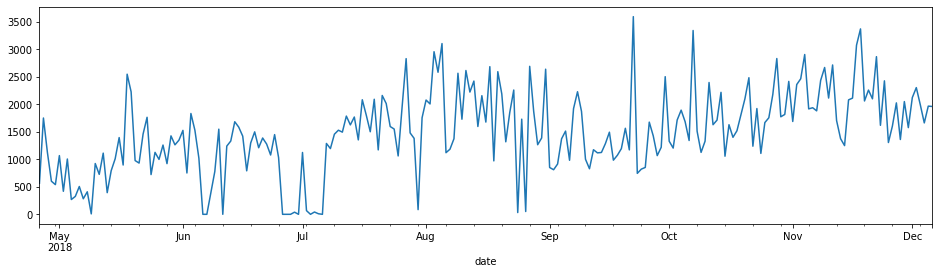

In [27]:
df.activity_calories.resample('D').mean().plot(figsize=(16,4))

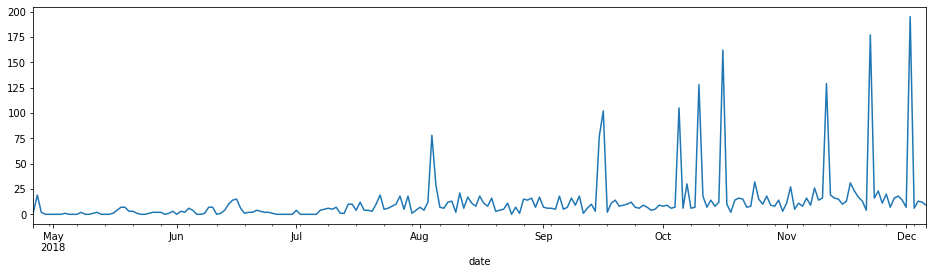

In [28]:
df.floors.resample('D').mean().plot(figsize=(16,4))

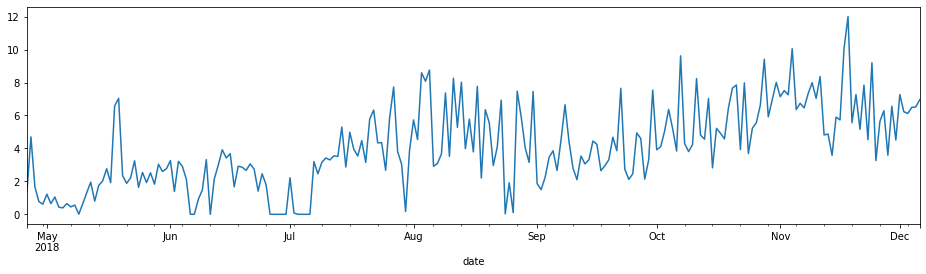

In [29]:
df.distance.resample('D').mean().plot(figsize=(16,4))

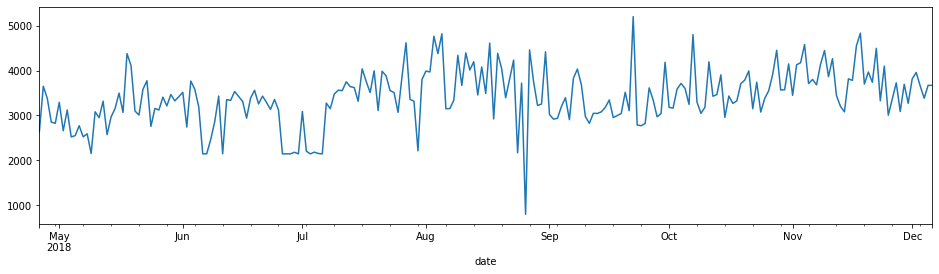

In [30]:
df.calories_burned.resample('D').mean().plot(figsize=(16,4))

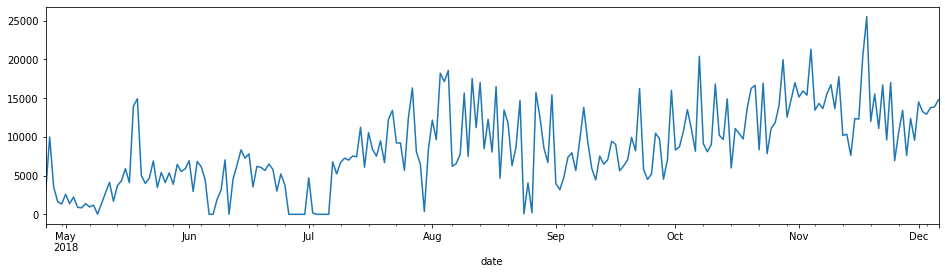

In [31]:
df.steps.resample('D').mean().plot(figsize=(16,4))

In [32]:
df.head()

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2,1347.0,93,0,0,566.0
2018-04-27,3649.0,9971.0,4.70,19,1158.0,219,46,17,1752.0
2018-04-28,3379.0,3521.0,1.66,2,702.0,155,22,11,1124.0
2018-04-29,2851.0,1639.0,0.77,0,891.0,122,0,0,602.0
2018-04-30,2825.0,1323.0,0.62,0,880.0,104,0,0,540.0
